<a href="https://colab.research.google.com/github/FelixPotato2/skills-introduction-to-github/blob/main/Predict_district_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# END-TO-END MACHINE LEARNING PROJECT

### Load the data

In [1]:
!git clone "https://github.com/ageron/data"

Cloning into 'data'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 56 (delta 3), reused 12 (delta 2), pack-reused 43 (from 1)
Receiving objects: 100% (56/56), 17.26 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [225]:
import pandas as pd

In [226]:
data = '/content/data/housing/housing.csv'
housing = pd.read_csv(data)

### Initial data exploration

In [227]:
housing.shape

(20640, 10)

In [228]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Use info( ) method to get a quick description of the data

In [229]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that there are 20640 instances in the dataset. Also, the total_bedrooms are only 20433, which means there are missing features.

In [230]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


The describe( ) method shows a summary of the numerical attributes.

In [231]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


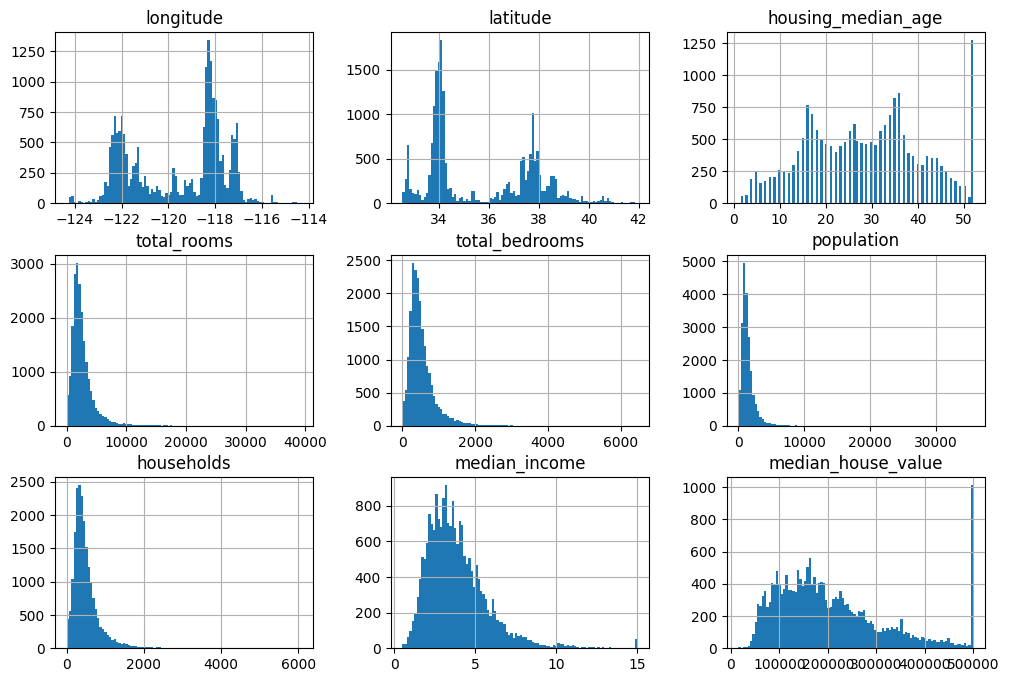

In [232]:
import matplotlib.pyplot as plt
housing.hist(bins = 100, figsize = (12,8))
plt.show()

From these graphs we can see various properties of the data at hand:

1. The median income is not expressed in US dollars. Capped at 0.5 for lower median incomes and 15 for higher median incomes. Each value has to be multiplied by 10000.
2. Housing median age and house value were also capped. In the second case, the model might learn that house prices never go beyond a cetrain price (in this case 500K). To solve this there are two possibilities:

  a. Collect labels for capped districts

  b. Remove districts from training set

3. All the attributes have different scales -> might want to consider feature scaling

4. Histograms are skewed right: extend to the right of the median more than to the left. We would like to make this in a way that we have a bell-shape curve.

## Create test set

### shuffle_ad_split_data method

To avoid data snooping bias we want to avoid looking at the test set completely, in order to not be biased by visually identifying patterns in the data and thus choosing a model accordingly.

In [233]:
import numpy as np

Define a function to split the data into training and test set, also shuffling the indeces.

In [234]:
def shuffle_and_split_data(data, test_ratio, random_seed):
  np.random.seed(random_seed)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [235]:
train_set, test_set = shuffle_and_split_data(housing, 0.2, 42)

In [236]:
print(f'Length of the training and testing set respectively; {len(train_set),len(test_set)}')

Length of the training and testing set respectively; (16512, 4128)


### Create test set - ID method

In order to split the data into train and test set we need to consider that setting the random seed is not enough to guarantee that in the test set are only instances that have never been on the training set. This happens both when we restart the process or when we add new data to the dataset. To solve the issue one way is to assign a unique identifier to each element of the dataset and calculate a corresponding hash value for each one. Then, by normalizing the hash values we would select just the ones that are below a certain threshold. This guarantees that even if we add new data, the same elements would go into the same set. To do so we could either assign a identifier based on properties of the data, or we could use the row index. However, using the row index can be problematic when we add new data or remove rows from the dataset, as we should check that the new rows are added at the end of the dataset.

In this case, we assing a unique identifier to each element of the dataset and we calculate the hash values using the hash( ) method.

First, we create a hash function that converts the identifier into a 32-bit unsigned integer, and we check whether this value is below a threshold determined by the test_ratio parameter.

In [237]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

In [238]:
def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

Then, since the dataset does not have an identifier column, we use the row index as a unique identifier. However, by doing so we still need to ensure that new data is appended at the end of the dataset.

In [239]:
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'index')

In [240]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'id')

### train_test_split

Scikit_learn provides a built-in function to split the data into train and test sets.

In [241]:
from sklearn.model_selection import train_test_split
train_test, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

### Stratified sampling

The methods discussed above are methods that are purely random to split data into train and test set. However, if the dataset is not large enough we need to stratify it in order to avoid including sampling bias.

This method consists of maintaining in the test and training set the representative percentages in each cathegory. The population is divided in subgroups called strata, and from each stratum one extracts the number of samples according to the ratio in the overall population.

In our example, we pretend that the median income is fundamental in the analysis, and so we split it into various categories.

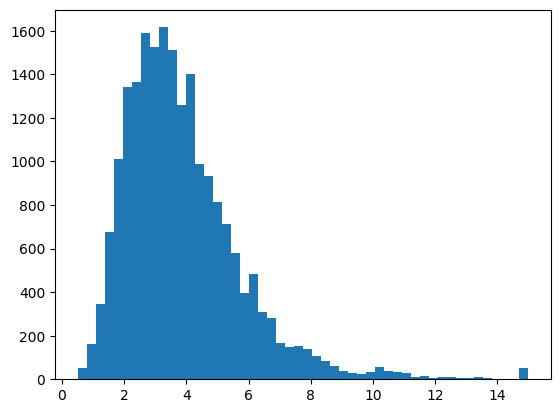

In [242]:
plt.hist(housing['median_income'], bins = 50)
plt.show()

When dividing the data into strata we want to have sufficient instances for each stratum and we do not want too many strata.

To create categories we use the pandas function cut(), which is useful in this case because it can be used to create a categorical variable from a continuous one.

In [243]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

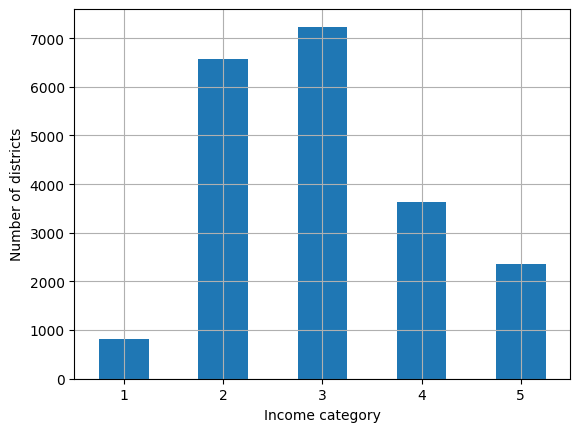

In [244]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Income category')
plt.ylabel('Number of districts')
plt.show()

Now we can do stratified sampling based on income category. To do so we use the sklearn.model_selection package, and in particular its split() method. This method yields the train and test indices of different splits.

In [245]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

In [246]:
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n = housing.loc[train_index]
  strat_test_set_n = housing.loc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

The previous cells generated 10 new dataframes in which data is stratified based on the distribution of the median_income. For the purposes of the next part of the analysis we can consider just the first train and test sets created.

In [247]:
strat_train_test, strat_test_set = strat_splits[0]

In general, to get a single split one can use the train_test_split() function by assigning the stratify argument:

In [248]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing['income_cat'], random_state = 42)

To see if it worked we can look at the income category proportions in the test set:

In [249]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


Also, we can check these proportions in the training set:

In [250]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


Then we check the proportions in the full dataset:

In [251]:
housing['income_cat'].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


It is clear that the proportions are maintained throughout the different datasets.

Since we do not need the income_cat column anymore, we can drop it.

In [252]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis = 1, inplace = True)

## Data Exploration - Training set

If the training set is very large it may be beneficial to consider just an exploration set, to make the process faster. Also, since we want to transform the training set, it is beneficial to copy the original one.

In [253]:
housing = strat_train_set.copy()

To visualize the data we can use a scatterplot since the information we have is geographical. This graph will help us identify which are the areas with the higher density.

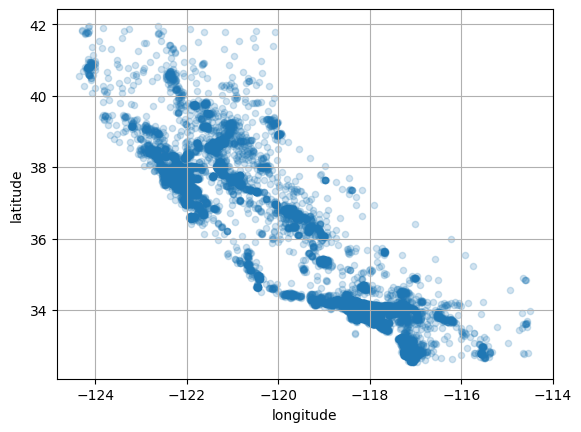

In [254]:
housing.plot(kind = 'scatter', x = 'longitude',
             y = 'latitude', grid = True, alpha = 0.2)
plt.show()

Then, we want to see the housing prices.

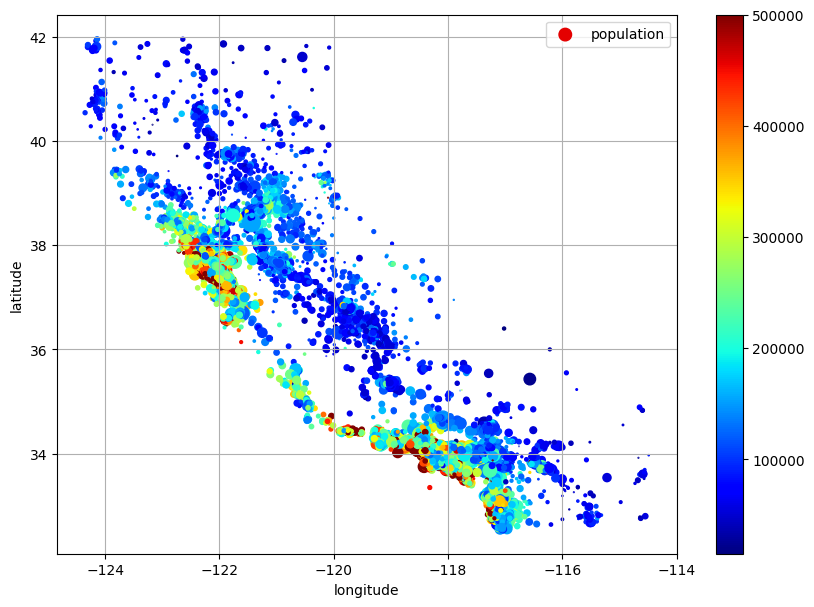

In [255]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
             s = housing['population'] / 100, label = 'population',
             c = housing['median_house_value'], cmap = 'jet', colorbar = True,
             legend = True, sharex = False, figsize = (10,7))
plt.show()

From this image we can infer that housing prices are closely related to the location and to the population density.

We can look more closely at correlation between the attributes, and since the dataframe is not too large we can consider the pairwise correlation between the attributes.

In [257]:
corr_matrix = housing.corr(numeric_only=True)

In [258]:
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


Another way to check for correlation is by using the scatter_matrix() function

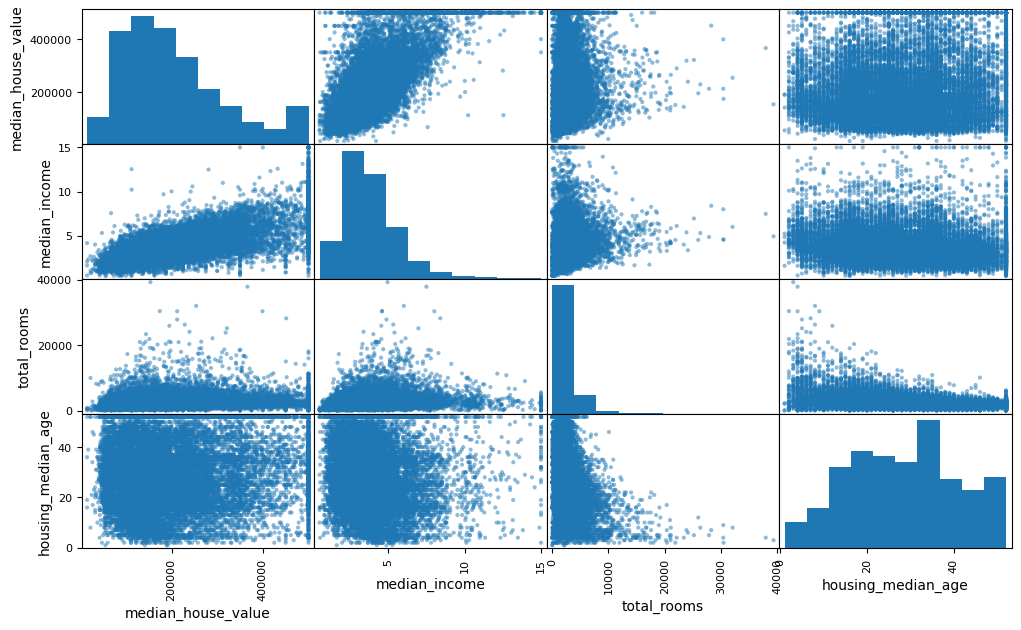

In [259]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
              'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,7))
plt.show()

From these graphs we can infer that the median_income is the most promising variable to make predictions on the housing prices. We can zoom in into the plot.

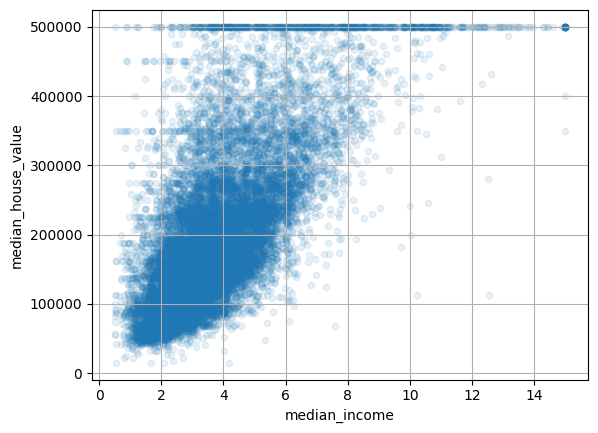

In [260]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value',
             alpha = 0.1, grid = True)
plt.show()

In this plot it is clearly visible the price cap previously set at ~\$500K. Also, there are other horizontal lines in correspondence to ~\$350K and ~\$280K, and we might want to remove them as well

Another thing we might do in order to study the data is to try out different attribute combinations. For example, we would like to know the number of rooms per household, instead of the number of rooms per district. Likewise, we would like to compare the number of bedrooms with the total number of rooms. We can create new attributes for these combinations.

In [261]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


In [262]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

We can now plot the correlation matrix again

In [263]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_household,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


## Prepare data for ML Algorithms

In [311]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

We noticed before that the total_bedrooms has some missing values, and we want to fix this. To do it we have three options:
1. Get rid of the district corresponding to the missing data -> dropna()
2. Get rid of the attribute -> drop()
3. IMPUTATION: Set the missing values to some value (e.g. zero, the mean, the median, ...) -> fillna()

1. First Method: Dropna()

In [312]:
housing.dropna(subset = ['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


2. Second Method: Drop()

In [316]:
housing.drop('total_bedrooms', axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1912.0,1172.0,3.5292,NEAR OCEAN


3. Third Method: Fillna()

In [317]:
median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna({'total_bedrooms': median}, inplace = True)
housing['total_bedrooms'].fillna(median)

,total_bedrooms
13096,1115.0
14973,354.0
3785,217.0
14689,851.0
20507,1211.0
...,...
14207,597.0
13105,592.0
19301,775.0
19121,873.0


The last option is the least destructive, so we are going to use that one. However, there is a way to implement the same strategy by using a method fo ScikitLearn: SimpleImputer. The nice thing about this is that it will store the median value of each feature, making possible to impute missing values in the validation and test sets as well as in the new data.

In [318]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
# Other possible strategies: mean, most_frequent, constant
# Other possible imputers: KNNImputer, IterativeImputer

The median can be computed just for numerical attributes, so we need to create a copy of the data without the ocean_proximity column.

In [319]:
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

By doing this the imputer computes the median of each column and stores this data in the statistics_ instance variable.

In [320]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [321]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now we can replace the missing values with the learned medians.

In [322]:
X = imputer.transform(housing_num)

In [323]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                           index = housing_num.index)

## Encoders - working with categorical variables

In [280]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


Since the categories are recurrent we can encode them into numerical variables so that the ML algorithm can work with numbers.

In [281]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [282]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

To get the list of categories one can use the categories_ instance variable

In [283]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The problem with this representation is that the computer interprets numbers in the usual way (e.g. numbers close to each other are similar), which is usually not a good assumption. Also we cannot perform numerical operations with these numbers. To solve this issue, the idea is to create one binary attribute per category, thus having an array with 1 in correspondence of the category of the specific element considered. This is called one-hot encoding. Notice that by definition the one hot encoded matrix is sparse.

In [284]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

To convert this matrix to an array one can use the toarray() mehtod.

In [285]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Pandas has a function called get_dummies() that converts each categorical feature into a one-hot-representation with one binary feature per category.

In [286]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test, dtype = int)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


Notice that if we use the encoder that we previously trained on the five categories, it will now recognize the two categories in the df_test, and when calling the transform method will encode just the given categories. On the other hand, the get_dummies method does not do this.

In [287]:
housing_cat_1h_prova = cat_encoder.transform(df_test)
housing_cat_1h_prova.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Also, OneHotEncoder can detect unknown categories and raises exceptions if we transform a dataframe with an unknown category. The get_dummies() method, on the other hand, adds a new column.

## Feature Scaling and Transformation

In most cases ML algorithms don't perform well when the input numerical attributes have very different scales. For this reason we need to apply feature scaling to the data. Two common ways to perfrom feature scaling are min-max scaling (normalization) and standardization.

### Min-max scaling

Values are shifted and rescaled so that they range from 0 to 1. The formula to do so is the following: $z = \frac{x - min(x)}{max(x) - min(x)}$

In [288]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range = (-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

This is the trained scaler on the training_data, once the scaler is trained, the validation set, the test set and the new data have to be transformed using the transform() method, not the fit_transform one.

With the MinMaxScaler we can use the clip hyperparameter (set to True) to aviod the outliers to be sclaed outside the specified range.

### Standardization

Standardization works by subtracting the mean value (so that the value of the mean is zero for standardized values), then it divides the result by the standard deviation (standardized values have standard deviation equal to 1). The values are not bounded to a specific range and for this reason standardization is less affected by outliers.

In [289]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

NOTE: if we want to scale a sparse matrix without converting it to a dense matrix we can use the with_mean hyperparameter set to False: this will only divide the data by the std without subtracting the mean (as this would imply the matrix is not sparse anymore)

NOTE: if the distribution has heavy tails (i.e. the values far from the mean are not exponentially rare), performing standardization or normalization does not solve the problems, since extreme values will still be quite frequent, and the distribution will be skewed. To solve this one can transofrm the data in various ways, among which:
1. Logarithm: If the feature has a long and heavy tail, the range is very large and we need to make data more symmetrical (e.g. power law distribution)
2. Square root: If the feature has a moderate tail, all values are positive and we are looking for a gentler transformation.
3. bucketizing or binning: divide the distribution into buckets of equal size (either the same number of data point or the same number of values). Assign an index to each bin (can be either numerical index which retain numerical meaning or a representative value such as the mean) and substitute that for each feature's value.

#### normal vs log data

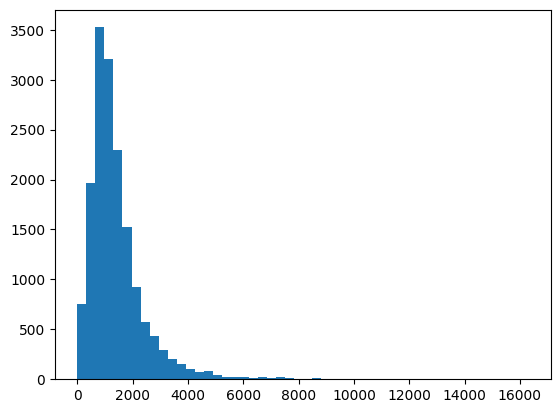

In [291]:
plt.hist(housing['population'], bins = 50)
plt.show()

In [292]:
housing_population_log = np.log(housing['population'])

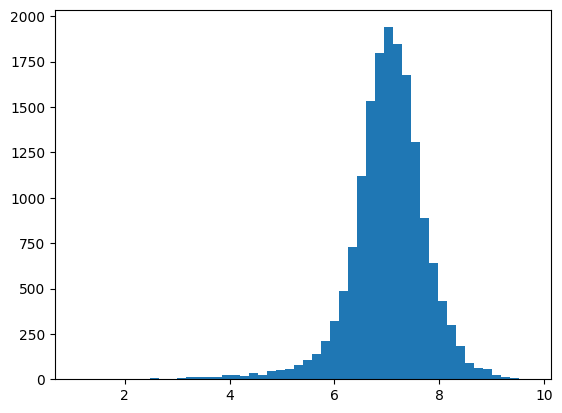

In [293]:
plt.hist(housing_population_log, bins = 50)
plt.show()

#### Multimodal - Bucketing

A multimodal distribution has multiple peaks, which means that different ranges of values may have different behaviours. In this case, we do not want to assign numerical values to the bins since the model could learn false relationships between the data (since the numerical indeces retain their numerical value). For this reason, the solution to the problem is to perform one-hot-encoding on the data, in such a way as to treat each bin as a different category.

**Another Approach: RBF**
We create a new feature that measures how close each feature is to every peak (mode). We create a new feature for every peak in the data, and we apply the *Radial Basis Function* to calculate the distance between a data point and the peak value. The most common Radial Basis Function is the Gamma function:
$$similarity = exp(-\gamma(x-c)^2)$$
where:
- x is the input feature value
- c is the peak point
- $\gamma$ measures how quickly the similarity decreases as x moves away from c
- exp() ensures the similarity is always between 0 and 1

To apply this method we can use the rbf_kernel method of sklearn.metrics.pairwise

In [294]:
#Create a new feature that measures the similarity between the features and 35
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma = 0.1)

In [295]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)

In [210]:
gamma1 = 0.1
rbf1 = rbf_kernel(ages, [[35]], gamma = gamma1)

In [211]:
gamma2 = 0.03
rbf2 = rbf_kernel(ages, [[35]], gamma = gamma2)

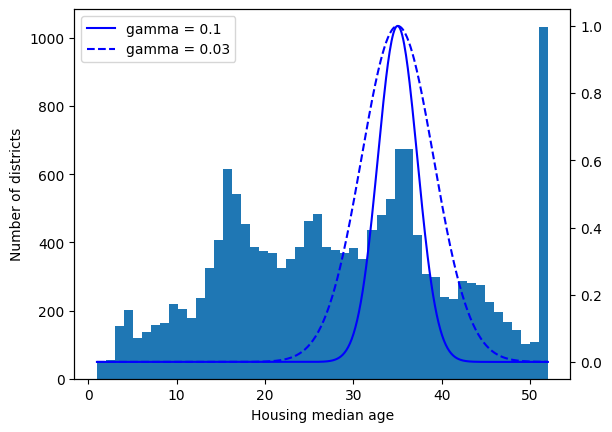

In [212]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Housing median age')
ax1.set_ylabel('Number of districts')
ax1.hist(housing['housing_median_age'], bins = 50)

ax2 = ax1.twinx() #Create an axis that shares the same x-axis
ax2.plot(ages, rbf1, color = 'blue', label = 'gamma = 0.1')
ax2.plot(ages, rbf2, color = 'blue', label = 'gamma = 0.03', linestyle = '--')

plt.legend()
plt.show()

### Transformations

#### using inverse_transform()

For now we have transformed the input features, but the target values need to be transformed as well. However, we might incur in a problem if we have transformed the tails using the logarithm. In this way, the model will predict the log of the target variable, so at the end we need to compute an exponential. To do so, we use the inverse_transform() method.

In [213]:
type(housing_labels)

pandas.core.series.Series

In [325]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

LinearRegression()

In [326]:
some_new_data = housing[['median_income']].iloc[:5]
scaled_predictions = model.predict(some_new_data)

In [327]:
predictions = target_scaler.inverse_transform(scaled_predictions)

In [328]:
scaled_predictions, predictions

(array([[-0.64466228],
        [ 0.80674175],
        [-0.52302364],
        [-0.5853166 ],
        [-0.12415952]]),
 array([[131997.15275877],
        [299359.35844434],
        [146023.37185694],
        [138840.33653057],
        [192016.61557639]]))

#### using TransformTargetRegressor

In [329]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer = StandardScaler())
model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

In [330]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

#### Custom Transformations

You may want to create custom transformations, for example the log transform mentioned before. Yo do so, one can use the FunctionTransformer method of sklearn.preprocessing

In [331]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['population']])

Additionally the funtion can take hyperparameters as optional arguments.

In [332]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y = [['35']], gamma = 0.1))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])

The rbf_kernel does not treat the features separately, meaning that if you pass two features it will calculate the 2D Euclidean distance to measure similarity.

In [333]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

You can also use custom transformers to combine features. For example, this transformer computes the ratio between input features 0 and 1

In [334]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1,2],[3,4]]))

array([[0.5 ],
       [0.75]])

If you want the transformer to be trainable so that it learns some parameters with the fit() method and then can be called on new data using the transform() method, it can be done by defining a custom class.

In [335]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator,  TransformerMixin):
  def __init__(self, with_mean = True):
    self.with_mean = with_mean

  def fit(self, X, y=None): #there need to be both X and y arguments, even if y is set to None
    X = check_array(X)
    self.mean_ = X.mean(axis = 0)
    self.sclae_ = X.std(axis = 0)
    self.n_features_in = X.shape[1] #Always check this number of features and use it to check in transform and predict methods
    return self #fit method always returns self

  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in == X.shape[1]
    if self.with_mean:
      X = X-self.mean_
    return X/self.scale_

Often custom transformers use other estimators. For example, the following uses the KMeans to cluster the data, and the uses the rbf_kernel() to measure the similarity of each sample to the center of the cluster.

In [397]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y = None, sample_weight = None):
    self.kmeans_ = KMeans(self.n_clusters, random_state = self.random_state)
    self.kmeans_.fit(X, sample_weight = sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma = self.gamma)

  def get_feature_names_out(self, input_features=None):
        return [f"geo_cluster_{i}" for i in range(self.n_clusters)]

In [337]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [338]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

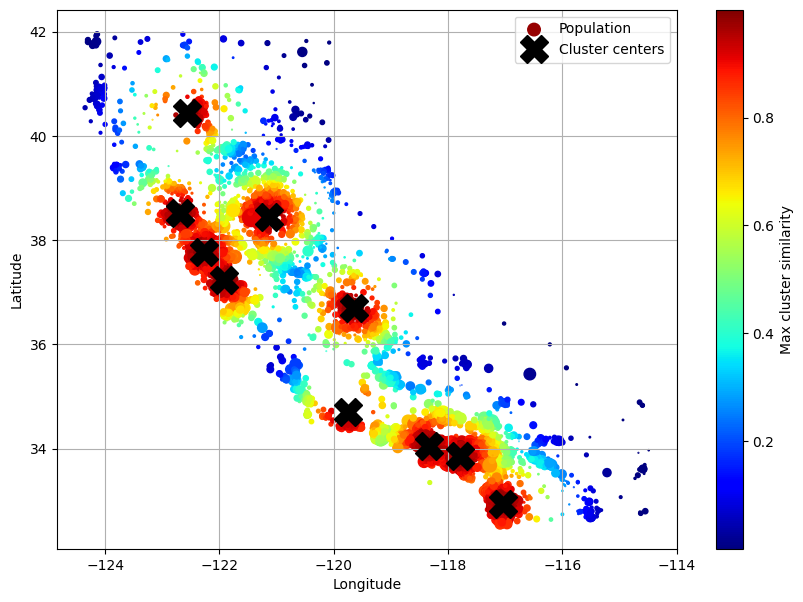

In [339]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### Transfromation Pipelines

There are many data transfirmation steps -> Pipeline class of Scikit-Learn.
It takes a list of tuples, with (name, estimator) where name can be any unique identifier and the estimator is any transformer (i.e. they have to have the fit_transform method).

In [343]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler()),
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

Pipelines supports indexing, so if I call pipeline[1] tihs would yield the first transformer in the pipeline and so on. One can also use the name_steps dictionary that links each assigned name to the estimators.

If you do not want to name the transformers you can use the make_pipeline() function instead. This takes a list of transformers as arguments and it creates a pipeline using as names the transformers classes' names in lowercase and without underscores.

In [350]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

When you call the fit() method in the pipeline, it calls the fit_transform() function sequentially on all transformers.
If you call the transform() methodn it will apply all transformations to the data.
If the pipeline has a predictor, calling predict transform sequentially the data until the last where it calls the predict()

In [351]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [352]:
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [355]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared,
                                       columns = num_pipeline.get_feature_names_out(),
                                       index = housing_num.index)

It is useful to be able to handle all data at once, without processing first the numerical values and then the categorical variables. To do so, one can use the ColumnTransformer. It requires a list of triplets each containing a name, the name of the pipeline (a transformer) and the list of names of columns which the pipeline is applied to.

In [358]:
from sklearn.compose import ColumnTransformer

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
              "total_bedrooms", "population", "households","median_income"]
cat_attribs = ['ocean_proximity']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore'))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])


To avoid listing all the columns' names one can use the make_column_selector() function which returns a selector function one can use to automatically select the features of a given type. Also, to avoid naming the transformers (pipelines) one can use the make_column_transformer() function.

In [360]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer((num_pipeline,
                                        make_column_selector(dtype_include = np.number)),
                                        (cat_pipeline,
                                         make_column_selector(dtype_include = object)),
                                        )

In [362]:
housing_prepared = preprocessing.fit_transform(housing)

In [368]:
df_housing_prepared = pd.DataFrame(housing_prepared,
                                   columns = preprocessing.get_feature_names_out(),
                                   index = housing.index)
df_housing_prepared.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


One can combine all previous code lines to perform preprocessing using a pipeline.

In [398]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(transformer, feature_names_in):
    return [f"{feature_names_in[0]}_div_{feature_names_in[1]}"]


def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [399]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [402]:
preprocessing.get_feature_names_out()

array(['bedrooms__total_bedrooms_div_total_rooms',
       'rooms_per_house__total_rooms_div_households',
       'people_per_house__population_div_households',
       'log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income', 'geo__geo_cluster_0',
       'geo__geo_cluster_1', 'geo__geo_cluster_2', 'geo__geo_cluster_3',
       'geo__geo_cluster_4', 'geo__geo_cluster_5', 'geo__geo_cluster_6',
       'geo__geo_cluster_7', 'geo__geo_cluster_8', 'geo__geo_cluster_9',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

# Select and Train Model